# Proyecto_Fina_Análisis_Datos_COVID_México

## Proyecto Final

Programar un sistema indicador de color de semáforo COVID.

* Tener una bd.csv con edad, indicador[0-1]

* Si el indicador es menor que 0.8 no tiene COVID

* Si el indicador es mayor o igual a 0.8 tiene COVID 
* La muestra será de 100 individuos

* Calcular el color del semáforo COVID en torno a:

    * Verde: 0 individuos con COVID

    * Amarillo: 1-30 individuos con COVID

    * Naranja: 31-70 individuos con COVID

    * Rojo: 71-100 individuos con COVID

* Calcular la edad promedio de las personas con COVID

Se importa la lireria *csv* para poder manejar nuestros datos guardados en archivos csv

In [2]:
import csv

Leemos la base de datos y algunos archivos de la columna empresas, estan divididas por espacios. Como diviremos la cadena en elemenos de una sub-lista, primero los dividiremos por espacios quitando el ;

In [3]:
bd = []
with open('bd2.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        x = row[0].replace(" ", "_")
        y = x.replace(";", " ")
        z = y.split()
        bd.append(z)
bd   


[['Nombre', 'Apellido', 'Anios', 'Ciudad', 'Empresa', 'Indice_de_COVID'],
 ['Wing', 'Leblanc', '62', 'Landshut', 'Urna_Associates', '0'],
 ['Barclay', 'Bryan', '15', 'Maria', 'Egestas_Blandit_Ltd', '0.21'],
 ['Cherokee', 'Ward', '55', 'Copertino', 'Nunc_Ltd', '0.84'],
 ['Kuame', 'Rodriquez', '91', 'Pichilemu', 'Vel_Venenatis_Institute', '0.13'],
 ['Myles',
  'Zimmerman',
  '33',
  'Zwolle',
  'Suspendisse_Aliquet_Industries',
  '0.99'],
 ['Xena', 'Love', '80', 'Bodmin', 'Integer_Tincidunt_Aliquam_LLC', '0.43'],
 ['Xantha', 'Brock', '86', 'Mytishchi', 'Maecenas_Foundation', '0.3'],
 ['Linda', 'Hunt', '110', 'Folx-les-Caves', 'Diam_Inc.', '0.09'],
 ['Mufutau', 'Keith', '73', 'Port_Lincoln', 'Quis_Industries', '0.21'],
 ['Norman',
  'Gibson',
  '108',
  'Wals-Siezenheim',
  'Pede_Blandit_Congue_Associates',
  '0.44'],
 ['Hiroko', 'Shields', '103', 'Chetwynd', 'Mauris_Limited', '0.02'],
 ['Aidan', 'Wilkins', '16', 'East_Kilbride', 'Egestas_A_Consulting', '0.53'],
 ['Hedley',
  'Alexander',

Volvemos a separar por espacios, las empresas con guines bajos

In [5]:
new_bd = []
for i,e in enumerate(bd):
    new_bd.append([])
    for j,f in enumerate(e):        
        new_bd[i].append(f.replace("_", " "))
new_bd

[['Nombre', 'Apellido', 'Anios', 'Ciudad', 'Empresa', 'Indice de COVID'],
 ['Wing', 'Leblanc', '62', 'Landshut', 'Urna Associates', '0'],
 ['Barclay', 'Bryan', '15', 'Maria', 'Egestas Blandit Ltd', '0.21'],
 ['Cherokee', 'Ward', '55', 'Copertino', 'Nunc Ltd', '0.84'],
 ['Kuame', 'Rodriquez', '91', 'Pichilemu', 'Vel Venenatis Institute', '0.13'],
 ['Myles',
  'Zimmerman',
  '33',
  'Zwolle',
  'Suspendisse Aliquet Industries',
  '0.99'],
 ['Xena', 'Love', '80', 'Bodmin', 'Integer Tincidunt Aliquam LLC', '0.43'],
 ['Xantha', 'Brock', '86', 'Mytishchi', 'Maecenas Foundation', '0.3'],
 ['Linda', 'Hunt', '110', 'Folx-les-Caves', 'Diam Inc.', '0.09'],
 ['Mufutau', 'Keith', '73', 'Port Lincoln', 'Quis Industries', '0.21'],
 ['Norman',
  'Gibson',
  '108',
  'Wals-Siezenheim',
  'Pede Blandit Congue Associates',
  '0.44'],
 ['Hiroko', 'Shields', '103', 'Chetwynd', 'Mauris Limited', '0.02'],
 ['Aidan', 'Wilkins', '16', 'East Kilbride', 'Egestas A Consulting', '0.53'],
 ['Hedley',
  'Alexander',

Algunos datos como la columna edad y la columna de Indice o indicador, los tenemos en cadenas, asi que iteraremos para convertir esos datos a numero

In [6]:
bd_v2 = []
for i,e in enumerate(new_bd):
    if i>0:
        nombre= e[0]
        apellido = e[1]
        edad = int(e[2])
        ciudad = e[3]
        empresa = e[4]
        indicador = float(e[5])
    
        bd_v2.append([nombre,apellido,edad,ciudad,empresa,indicador])
    
bd_v2

[['Wing', 'Leblanc', 62, 'Landshut', 'Urna Associates', 0.0],
 ['Barclay', 'Bryan', 15, 'Maria', 'Egestas Blandit Ltd', 0.21],
 ['Cherokee', 'Ward', 55, 'Copertino', 'Nunc Ltd', 0.84],
 ['Kuame', 'Rodriquez', 91, 'Pichilemu', 'Vel Venenatis Institute', 0.13],
 ['Myles', 'Zimmerman', 33, 'Zwolle', 'Suspendisse Aliquet Industries', 0.99],
 ['Xena', 'Love', 80, 'Bodmin', 'Integer Tincidunt Aliquam LLC', 0.43],
 ['Xantha', 'Brock', 86, 'Mytishchi', 'Maecenas Foundation', 0.3],
 ['Linda', 'Hunt', 110, 'Folx-les-Caves', 'Diam Inc.', 0.09],
 ['Mufutau', 'Keith', 73, 'Port Lincoln', 'Quis Industries', 0.21],
 ['Norman',
  'Gibson',
  108,
  'Wals-Siezenheim',
  'Pede Blandit Congue Associates',
  0.44],
 ['Hiroko', 'Shields', 103, 'Chetwynd', 'Mauris Limited', 0.02],
 ['Aidan', 'Wilkins', 16, 'East Kilbride', 'Egestas A Consulting', 0.53],
 ['Hedley', 'Alexander', 62, 'Daejeon', 'Sit Amet Nulla Corporation', 0.75],
 ['Ross', 'Becker', 14, 'Emmen', 'Lacus Aliquam Associates', 0.43],
 ['Thane', 

##### Pandas

Importaremos pandas para crear una tabla a aprtir de nuestros datos

In [8]:
import pandas as pd
pd.options.display.max_columns = None 
pd.options.display.max_rows = None

utilizamos ```pd.DataFrame``` y dentro de sus parametros colocamos nuestros datos y asignamos el nombre de cada columna

In [10]:
df= pd.DataFrame(bd_v2,columns=['Nombre', 'Apellido','Edad','Ciudad','Empresa','Indicador'])
df

,Nombre,Apellido,Edad,Ciudad,Empresa,Indicador
0,Wing,Leblanc,62,Landshut,Urna Associates,0.00
1,Barclay,Bryan,15,Maria,Egestas Blandit Ltd,0.21
2,Cherokee,Ward,55,Copertino,Nunc Ltd,0.84
3,Kuame,Rodriquez,91,Pichilemu,Vel Venenatis Institute,0.13
4,Myles,Zimmerman,33,Zwolle,Suspendisse Aliquet Industries,0.99
5,Xena,Love,80,Bodmin,Integer Tincidunt Aliquam LLC,0.43
6,Xantha,Brock,86,Mytishchi,Maecenas Foundation,0.30
7,Linda,Hunt,110,Folx-les-Caves,Diam Inc.,0.09
8,Mufutau,Keith,73,Port Lincoln,Quis Industries,0.21
9,Norman,Gibson,108,Wals-Siezenheim,Pede Blandit Congue Associates,0.44


Contamos con varias funciones en pandas como ```sort_values()``` ```vulue_counts()``` ```unique()``` ```tolist()```

Un ejemplo es como podemos buscar dentro de la tabla
Buscaremos personas que viven en **Montgomery**

In [11]:
df[df.Ciudad == 'Montgomery']

,Nombre,Apellido,Edad,Ciudad,Empresa,Indicador
26,Rhea,Daniel,40,Montgomery,Id Sapien Cras Institute,0.27
35,Cairo,Merritt,15,Montgomery,Cursus Incorporated,0.42
66,Coby,Ellis,67,Montgomery,Nec LLP,0.78
75,Oscar,Greer,69,Montgomery,Aliquam Enim Nec Incorporated,0.29


##### Matplotlib para graficas

Utilizaremos Matoplotlib para algunas gráficas

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

## Personas que tienen Indice > 0.80 == COVID

Empezaremos a trabajar con la tabla de personas que tienen COVID.
Para detectar quien en nuestra tabla esta contagiado de COVID, tiene un indicador > a 0.8 asi que buscaremos solo las personas que tegan el indice mayor

In [16]:
df[df.Indicador > 0.80]

,Nombre,Apellido,Edad,Ciudad,Empresa,Indicador
2,Cherokee,Ward,55,Copertino,Nunc Ltd,0.84
4,Myles,Zimmerman,33,Zwolle,Suspendisse Aliquet Industries,0.99
15,Iona,Martin,105,Dro,Dolor Nonummy Corp.,0.91
17,Alma,Sykes,42,Wazirabad,Sed Diam LLC,0.91
19,Lamar,Greer,76,Waarloos,Et Euismod Incorporated,0.93
21,Armando,Campos,98,Kollam,Laoreet Posuere Enim Industries,0.81
30,Jenna,Blair,18,Thuillies,Pede Company,0.93
43,Nicholas,Sims,99,Piringen,Molestie Sed Corporation,0.86
44,Britanni,Mann,70,Meerut Cantonment,Eget Ipsum Suspendisse LLP,0.91
46,Xerxes,Howe,37,Sao Joao de Meriti,Vehicula Risus Nulla PC,0.81


Para saber la cantidad de personas que tienen COVID, podemos medir el largo de la tabla con ```len()```

In [17]:
len(df[df.Indicador > 0.80])

21

In [19]:
print("%d personas tienen un indicador de COVID mayor de 0.8"%(len(df[df.Indicador > 0.80])))

21 personas tienen un indicador de COVID mayor de 0.8


## Rango de edad de las personas que tienen Covid

Para sacar e porcentaje de personas que tienen COVID, se hara autoincremental donde depeneidnedo la cantidad de personas, se sacara automaticamente el porcentaje de personas con COVID

Así que haremos una regla de 3 de la cantidad de personas con COVID multiplicada por el 100 y dividida por la cantidad total de personas en la base de datos

In [21]:
porcentajePersonasSinCOVID = ((len(df[df.Indicador < 0.80].index.tolist()))*100)/(len(df))

Tambien sacamos el porcentaje de personas que no tienen COVID

In [25]:
porcentajePersonasConCOVID = ((len(df[df.Indicador >= 0.80].index.tolist()))*100)/(len(df))

##### Gráfica

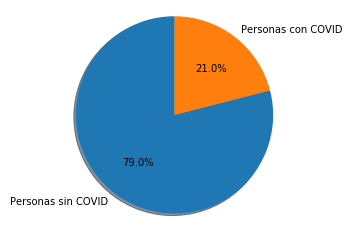

In [27]:
labels = ['Personas sin COVID','Personas con COVID'] #int(porcentajePersonasSinCOVID)
sizes = [(int(porcentajePersonasSinCOVID)),(int(porcentajePersonasConCOVID))] 

explode = (0,  0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()


## Grafica de Pastel para representar los rangos de edad de las personas con COVID

Volveremos a utilizar la tabla de personas con COVID y agregaremos un filtro de edad, para saber cuantas personas tienen COVID con menos de 20 años

In [29]:
rango1 = df[(df.Indicador > 0.80) & (df.Edad < 20)]
rango1

,Nombre,Apellido,Edad,Ciudad,Empresa,Indicador
30,Jenna,Blair,18,Thuillies,Pede Company,0.93
55,Edward,Johnston,8,Banff,Elit LLC,1.00
78,Michael,Tate,3,Pacoa,A Arcu Sed Incorporated,0.86


Así aplicaremos la formula para los siuientes rangos solicitados en el proyecto

In [30]:
rango2 = df[(df.Indicador > 0.80) & (df.Edad >= 20) & (df.Edad <40)]
rango2

,Nombre,Apellido,Edad,Ciudad,Empresa,Indicador
4,Myles,Zimmerman,33,Zwolle,Suspendisse Aliquet Industries,0.99
46,Xerxes,Howe,37,Sao Joao de Meriti,Vehicula Risus Nulla PC,0.81


In [31]:
rango3 = df[(df.Indicador > 0.80) & (df.Edad >= 40) & (df.Edad <60)]
rango3

,Nombre,Apellido,Edad,Ciudad,Empresa,Indicador
2,Cherokee,Ward,55,Copertino,Nunc Ltd,0.84
17,Alma,Sykes,42,Wazirabad,Sed Diam LLC,0.91
59,Veda,Copeland,41,Waarloos,Dolor PC,0.82


In [32]:
rango4 = df[(df.Indicador > 0.80) & (df.Edad >= 60)]
rango4

,Nombre,Apellido,Edad,Ciudad,Empresa,Indicador
15,Iona,Martin,105,Dro,Dolor Nonummy Corp.,0.91
19,Lamar,Greer,76,Waarloos,Et Euismod Incorporated,0.93
21,Armando,Campos,98,Kollam,Laoreet Posuere Enim Industries,0.81
43,Nicholas,Sims,99,Piringen,Molestie Sed Corporation,0.86
44,Britanni,Mann,70,Meerut Cantonment,Eget Ipsum Suspendisse LLP,0.91
61,Travis,Robinson,93,Kollam,Proin Ultrices Duis Institute,0.95
76,Penelope,Silva,98,La Roche-sur-Yon,Convallis Ligula Corp.,0.82
79,Curran,Ryan,76,Maria,Neque Institute,0.88
80,Camilla,Melton,85,Copertino,Lorem Sit Amet PC,0.87
87,Lydia,Roach,98,Wals-Siezenheim,Sed Company,0.93


Sacaremos la cantidad total por cada tabla utilizando la funcion ```len()```

In [33]:
datosEdades = [[(len(rango1)),(len(rango2)),(len(rango3)),(len(rango4))]]

##### Gráfica

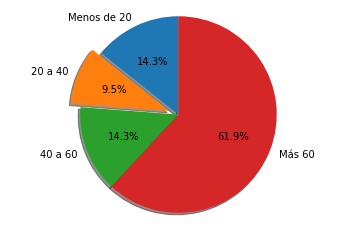

In [34]:
labels = ['Menos de 20', '20 a 40','40 a 60','Más 60']
sizes = [(len(rango1)),(len(rango2)),(len(rango3)),(len(rango4))]

explode = (0, 0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [37]:
tablaEdades= pd.DataFrame(datosEdades,index=['Personas'],columns=['Menos de 20 años', '20 a 40 años','40 a 60 años','Más 60 años'])
tablaEdades

,Menos de 20 años,20 a 40 años,40 a 60 años,Más 60 años
Personas,3,2,3,13


Tambien podemos pintarlo en una gráfica de barras utilizando los mismos valores

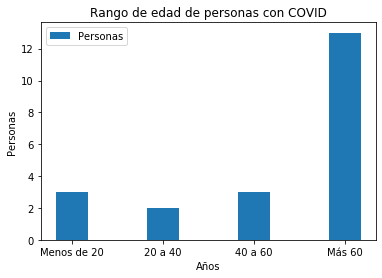

In [39]:
labels = ['Menos de 20', '20 a 40','40 a 60','Más 60']
men_means = [(len(rango1)),(len(rango2)),(len(rango3)),(len(rango4))]


width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, label='Personas')

ax.set_ylabel('Personas')
ax.set_xlabel('Años')
ax.set_title('Rango de edad de personas con COVID')
ax.legend()

plt.show()

## Edad promedio

Para sacar el promedio de la edad, primero obtendremos la edad de las personas con COVID, que sera de la taba COVID

In [43]:
edades = df[df.Indicador > 0.80].Edad.tolist()
print(edades)

[55, 33, 105, 42, 76, 98, 18, 99, 70, 37, 8, 41, 93, 98, 3, 76, 85, 98, 101, 103, 102]


Hacemos una teración en esa ista para sumar cada elemento

In [46]:
promedio = 0
for i,e in enumerate(edades):
    promedio = promedio + e
    
promedio = promedio / (len(df[df.Indicador > 0.80]))

In [47]:
print(" El promedio de edad de las personas que tienen covid es de %.f años" %(promedio))

 El promedio de edad de las personas que tienen covid es de 69 años


## Ciudad donde hay más contagiados

De nuevo utilizaremos la tabla con personas con COVID y esta vez contaremos las ciudades 

In [51]:
tabla2 = df[df.Indicador > 0.80].Ciudad.value_counts()
tabla3 = pd.DataFrame(tabla2)
tabla3

,Ciudad
Kollam,2
Waarloos,2
Dro,2
Copertino,2
Pacoa,1
Wazirabad,1
Bodmin,1
Meerut Cantonment,1
Sao Joao de Meriti,1
Zwolle,1


Obtendremos los indices de las ciudades y la cantidad de personas que hay en cada ciudad

In [53]:
ciudades = list(tabla3.index)
personasCiudad = tabla3['Ciudad'].tolist()

print(ciudades)
print(personasCiudad)

['Kollam', 'Waarloos', 'Dro', 'Copertino', 'Pacoa', 'Wazirabad', 'Bodmin', 'Meerut Cantonment', 'Sao Joao de Meriti', 'Zwolle', 'Piringen', 'La Roche-sur-Yon', 'Banff', 'Wals-Siezenheim', 'Thuillies', 'Haveli', 'Maria']
[2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


##### Gráfica

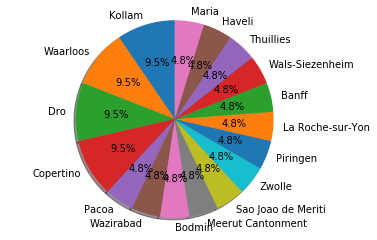

In [54]:
labels = ciudades
sizes = personasCiudad

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

###### Kollam, Waarloos, Dro, Copertino tienen 9.5% de indice de covid de la base de datos